<a href="https://colab.research.google.com/github/DaoOfDreams/DAV_52/blob/main/DAV_Exp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Text Analysis**

*The Psychology of Money: Timeless Lessons on Wealth, Greed, and Happiness*

>Text Analysis Using R

In [ ]:
install.packages(c("tm","quanteda"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages(c("tm", "quanteda")):
“installation of package ‘quanteda’ had non-zero exit status”


In [ ]:
system('sudo apt-get install libpoppler-cpp-dev')

In [ ]:
install.packages("pdftools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("pdftools"):
“installation of package ‘pdftools’ had non-zero exit status”


In [ ]:
library(tm)
library(pdftools)

pdf_file <- "/content/Morgan Housel - The Psychology of Money.pdf"
list_output <- pdf_text(pdf_file)

length(list_output)
cat(list_output[[8]])

[1] 214

“A genius is the man who can do the average thing when
     everyone else around him is losing his mind.”
                      —Napoleon


“The world is full of obvious things which nobody by any
                 chance ever observes.”
                  —Sherlock Holmes


In [ ]:
typeof(list_output)

[1] "character"

In [ ]:
corpus <- Corpus(VectorSource(list_output))
print(corpus)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 214


In [ ]:
typeof(corpus)
class(corpus)

[1] "list"

[1] "SimpleCorpus" "Corpus"

In [ ]:
printPage <- function(a) {
    cat("\n")
    print(corpus[[a]])
    corpus[[a]]$content
}

printPage(8)


<<PlainTextDocument>>
Metadata:  7
Content:  chars: 272


[1] "“A genius is the man who can do the average thing when\n     everyone else around him is losing his mind.”\n                      —Napoleon\n\n\n“The world is full of obvious things which nobody by any\n                 chance ever observes.”\n                  —Sherlock Holmes\n"

In [ ]:
corpus <- tm_map(corpus, stripWhitespace)
printPage(8)

Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
“transformation drops documents”



<<PlainTextDocument>>
Metadata:  7
Content:  chars: 208


[1] "“A genius is the man who can do the average thing when everyone else around him is losing his mind.” —Napoleon “The world is full of obvious things which nobody by any chance ever observes.” —Sherlock Holmes "

There is an additional character that's being counted, the actual char count is 207.

In [ ]:
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
printPage(8)

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”



<<PlainTextDocument>>
Metadata:  7
Content:  chars: 206


[1] "“a genius is the man who can do the average thing when everyone else around him is losing his mind” —napoleon “the world is full of obvious things which nobody by any chance ever observes” —sherlock holmes "

In [ ]:
corpus <- tm_map(corpus, removeWords, stopwords("english"))
printPage(8)

Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
“transformation drops documents”



<<PlainTextDocument>>
Metadata:  7
Content:  chars: 163


[1] "“ genius   man  can   average thing  everyone else around   losing  mind” —napoleon “ world  full  obvious things  nobody   chance ever observes” —sherlock holmes "

In [ ]:
tokens_tm <- tokens(as.character(corpus))

In [ ]:
words <- unlist(sapply(corpus, words))
head(words,10)

[1] "parents"      "teach"        "gretchen"     "guides"       "miles"       
 [6] "reese"        "inspire"      "introduction" "greatest"     "show"

In [ ]:
library("quanteda")

In [ ]:
tokens <- tokens(list_output, what = "sentence")

sentences <- as.character(tokens)

print(head(sentences,10))

 [1] "              For    My parents, who teach me."
 [2] "Gretchen, who guides me."                      
 [3] "Miles and Reese, who inspire me."              
 [4] "Introduction: The Greatest Show On Earth   1." 
 [5] "No One’s Crazy   2."                           
 [6] "Luck & Risk   3."                              
 [7] "Never Enough   4."                             
 [8] "Confounding Compounding   5."                  
 [9] "Getting Wealthy vs. Staying Wealthy   6."      
[10] "Tails, You Win"                                


In [ ]:
tdm <- TermDocumentMatrix(corpus)
freq_dist <- rowSums(as.matrix(tdm))

head(sort(freq_dist, decreasing = TRUE), 10)

’s    can people    one  money      “   will   like  world    ’re 
   377    234    212    193    184    148    146    143    136    135

In [ ]:
df_plot <- data.frame(word = names(freq_dist),
                 count = as.numeric(freq_dist),
                 stringsAsFactors = FALSE)

top_10_df <- head(df_plot[order(-df_plot$count), ], 10)


In [ ]:
library("ggplot2")

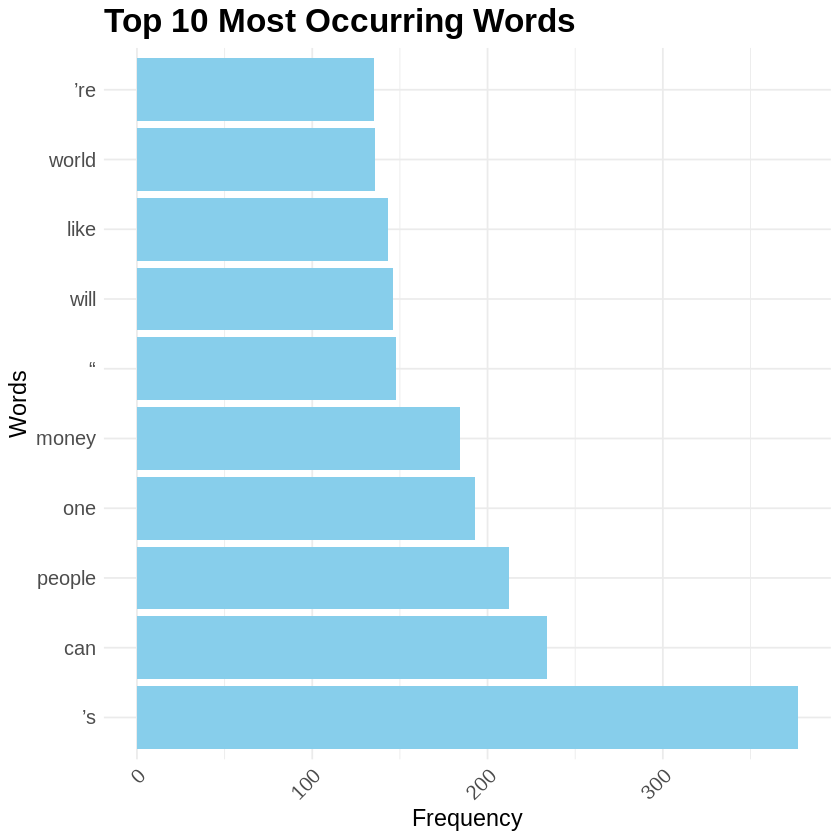

In [ ]:
ggplot(top_10_df, aes(x = reorder(word, -count), y = count)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Top 10 Most Occurring Words",
       x = "Words",
       y = "Frequency") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        plot.title = element_text(size = 20, face = "bold"),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12),
        legend.position = "none") +
  coord_flip()

In [ ]:
printPage(55)


<<PlainTextDocument>>
Metadata:  7
Content:  chars: 1475


[1] " one   worst months   history   stock market  became one   richest men   world  livermore’s family celebrated  unfathomable success another man wandered  streets  new york  desperation abraham germansky   multimillionaire real estate developer  made  fortune   roaring s   economy boomed    virtually every  successful new yorker    late s bet heavily   surging stock market  october th   new york times published  article   two paragraphs portrays  tragic ending bernard h sandler attorney   broadway  asked yesterday morning  mrs abraham germansky  mount vernon  help find  husband missing since thursday morning germansky    years old   east side real estate operator  said  sandler   invested heavily  stocks sandler said   told  mrs germansky   friend saw  husband late thursday  wall street near  stock exchange according   informant  husband  tearing  strip  ticker tape  bits  scattering    sidewalk   walked toward broadway    far   know   end  abraham germansky     contrast  october  crash made jesse livermore one   richest men   world  ruined abraham germansky perhaps taking  life  fastforward four years   stories cross paths     blowout livermore overflowing  confidence made larger  larger bets  wound  far   head  increasing amounts  debt  eventually lost everything   stock market broke  ashamed  disappeared  two days    wife set   find  “jesse l livermore  stock market operator   park avenue missing     seen since pm yesterday”  new york times wrote   "

In [ ]:
tokens <- tokens(list_output)

stemmed_tokens <- tokens(tokens, what = "stem")
print(stemmed_tokens[24])


Tokens consisting of 1 document.
text24 :
 [1] "Few"         "people"      "make"        "financial"   "decisions"  
 [6] "purely"      "with"        "a"           "spreadsheet" "."          
[11] "They"        "make"       
[ ... and 213 more ]



In [ ]:
lemmatized_tokens <- tokens(tokens, what = "lemma")
print(lemmatized_tokens[9])

Tokens consisting of 1 document.
text1 :
[1] "running"



In [ ]:
pos_tags <- pos(tokens, model = "universal")
head(pos_tags)

ERROR: Error in pos(tokens, model = "universal"): could not find function "pos"


Web Scrapping

In [ ]:
install.packages(c("rvest","stringr"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(rvest)
library(stringr)

In [ ]:
url = "https://www.wunderground.com/history/daily/in/new-delhi/VIDP/date/2022-1-1/CustomHistory.html?dayend=31&monthend=2&yearend=2022&format=1"

In [ ]:
webpage <- read_html(url)

# table_data <- webpage %>%
#   html_node("#inner-content > div.region-content-main > div.row > div:nth-child(5) > div:nth-child(1) > div > lib-city-history-observation > div > div.observation-table.ng-star-inserted > table") %>%
#   html_table(fill = TRUE)

# print(table_data)

ERROR: Error in open.connection(x, "rb"): HTTP error 404.


Wunderground web scraping not working

In [ ]:
url <- "https://en.wikipedia.org/wiki/Web_scraping"

webpage <- read_html(url)

titles <- webpage %>%
  html_nodes("h2") %>%
  html_text()

print(titles)

[1] "Contents"                             
[2] "History[edit]"                        
[3] "Techniques[edit]"                     
[4] "Software[edit]"                       
[5] "Legal issues[edit]"                   
[6] "Methods to prevent web scraping[edit]"
[7] "See also[edit]"                       
[8] "References[edit]"                     


In [ ]:
History <- webpage %>%
  html_nodes("#mw-content-text > div.mw-content-ltr.mw-parser-output > ul:nth-child(16)") %>%
  html_text() %>%
  str_extract("\\d+")

print(History)

[1] "1989"
